# PROJECT : FACE EXPRESSION RECOGNITION USING PYTORCH

In this project we are required to have in depth knowledge on convulational neural network and optimization algorithm  such as gradient descent , adam optimizer.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import torch 

# LOADING DATASET

In [2]:
train_dataset_path ='/kaggle/input/face-expression-recognition-dataset/images/train'
valid_dataset_path = '/kaggle/input/face-expression-recognition-dataset/images/validation'

1. **iteration** is whenever network weights are updated in a neural newtork
2. **Epoch** is when network has seen whole dataset.Always apply multiple number of epochs to increase accuracy.Length of Epoch may vary a lot depending on complexity of dataset and as an estimate for beginner it ranges between 5 to 40. Some epochs take seconds some hours.Independant metric from Batch Size.
3. **Batch Size** used when epoch size is way to large for our ram so to shorten it we divide iterations under epoch into small batch.


In [3]:
LR = 0.001
EPOCHS = 20
BATCH_SIZE = 32



DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#CUDA® is a parallel computing platform and programming model developed by NVIDIA for general computing on graphical processing units (GPUs). With CUDA, developers are able to dramatically speed up computing applications by harnessing the power of GPUs.
MODEL_NAME = 'efficientnet_b0'



In [4]:
from torchvision.datasets import ImageFolder
from torchvision import transforms as T 


In [5]:
train_augs = T.Compose([T.RandomHorizontalFlip(p = 0.5),T.RandomRotation(degrees = (-20,+20)),T.ToTensor()])
#To tensor in pytorch converts image from numpy or PIL into pytorch tensors also it will convert (h,w,c)->(c,h,w)
valid_augs = T.Compose([T.ToTensor()])

**Data Augmnetation** is done to avoid overfitiing. This is done by generating new sample of already existing data . like let's say we have only 1 image in our data set fliping and inverting the image makes 3 images of the same image. when this will be done on a larger scale it will improve our results drastically.

In [6]:
trainset = ImageFolder(train_dataset_path,transform = train_augs)
validset = ImageFolder(valid_dataset_path,transform = valid_augs)

In [7]:
import plotly.express as px

def plot_dist(my_dict, data):
    fig = px.bar(x=my_dict.values(),
             y=my_dict.keys(),
             orientation='h',
             color=my_dict.values(),
             title=data + ' Distribution',
             opacity=0.8,
             color_discrete_sequence=px.colors.diverging.curl,
             template='plotly_dark'
            )
    fig.update_xaxes()
    fig.show()

In [ ]:
from torchvision.datasets import ImageFolder
from collections import Counter


labels = [label for _, label in trainset]

# Count the occurrences of each class
class_counts = Counter(labels)

plot_dist(class_counts, 'Trainset')

In [9]:
len(trainset)

28821

In [10]:
len(validset)

7066

torch.Size([3, 48, 48])


Text(0.5, 1.0, '0')

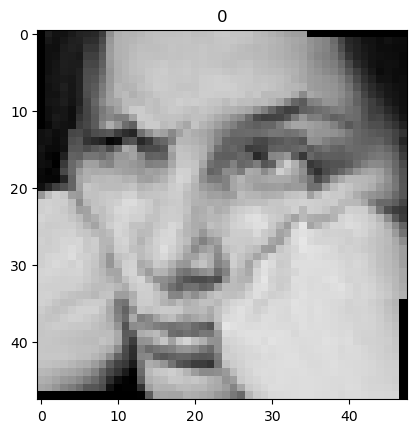

In [11]:
image , label = trainset[10]
print(image.shape)
plt.imshow(image.permute(1,2,0)) #(c,h,w)->(h,w,c)c at 0,h at 1 and w at 2
plt.title(label)

In [12]:
print(trainset.class_to_idx)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


Text(0.5, 1.0, '3')

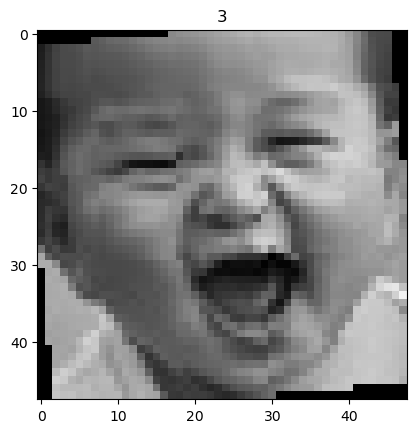

In [13]:
image , label = trainset[10000]
plt.imshow(image.permute(1,2,0)) #(c,h,w)->(h,w,c)c at 0,h at 1 and w at 2
plt.title(label)

Text(0.5, 1.0, '2')

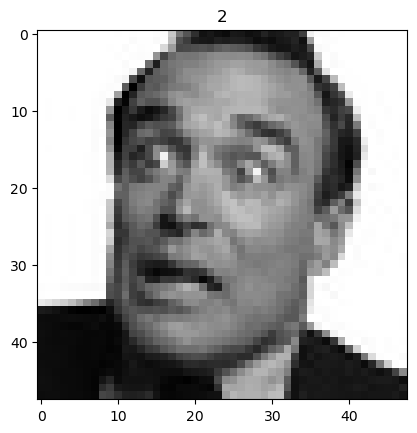

In [14]:
image , label = validset[2000]
plt.imshow(image.permute(1,2,0)) #(c,h,w)->(h,w,c)c at 0,h at 1 and w at 2
plt.title(label)

In [15]:
print(validset.class_to_idx)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


# LOAD DATASET INTO SMALL BATCHES

In [16]:
from torch.utils.data import DataLoader

In [17]:
trainloader = DataLoader(trainset,batch_size=BATCH_SIZE,shuffle = True)
validloader = DataLoader(validset,batch_size=BATCH_SIZE)

In [18]:
len(validloader) #totla number of batches in validset

221

In [19]:
for images,labels in trainloader:
    break;
print(f"one images of batch shape {images.shape}")#[32 -> batch size, 3->labels , 48->height,48 -> width]
print(f"one label batch shape {labels.shape}")

one images of batch shape torch.Size([32, 3, 48, 48])
one label batch shape torch.Size([32])


# CREATE MODEL

In [20]:
import timm 
from torch import nn 

In [21]:
class ResNetModel(nn.Module):
    def __init__(self):
        super(ResNetModel,self).__init__()
        self.eff_net = timm.create_model('resnet34',pretrained = True,num_classes = 7)
    def forward(self,images,labels = None):
        logits = self.eff_net(images)
        if labels != None:
            loss = nn.CrossEntropyLoss()(logits,labels)
            return logits,loss
        return logits

In [22]:
resnet_model = ResNetModel()

resnet_model.to(DEVICE)

ResNetModel(
  (eff_net): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act1): ReLU(inplace=True)
        (aa): Identity()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): ReLU(inplace=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(

# CREATE TRAIN AND EVAL

In [23]:
from tqdm import tqdm

In [24]:
def multiclass_accuracy(y_pred,y_true):
    top_p,top_class = y_pred.topk(1,dim = 1)
    equals = top_class == y_true.view(*top_class.shape)
    return torch.mean(equals.type(torch.FloatTensor))

In [25]:
def train_fn(model,dataloader,optimizer,current_epo):
    model.train()
    total_loss = 0.0
    total_acc = 0.0 
    tk = tqdm(dataloader,desc = "EPOCHS" + "[TRAIN]" + str(current_epo+1) + "/"+ str(EPOCHS))
    for t,data in enumerate(tk):
        images,labels = data
        images,labels = images.to(DEVICE),labels.to(DEVICE)
        
        optimizer.zero_grad()
        logits,loss = model(images,labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_acc += multiclass_accuracy(logits,labels)
        tk.set_postfix({'loss':'%6f' %float(total_loss/(t+1)),'acc':'%6f' %float(total_acc/(t+1))})
    return total_loss/len(dataloader),total_acc/len(dataloader)

In [26]:
def eval_fn(model,dataloader,current_epo):
    model.eval()
    total_loss = 0.0
    total_acc = 0.0 
    tk = tqdm(dataloader,desc = "EPOCH" + "[VALID]" + str(current_epo + 1) + "/"+ str(EPOCHS))
    for t,data in enumerate(tk):
        images,labels = data
        images,labels = images.to(DEVICE),labels.to(DEVICE)
        
        
        logits,loss = model(images,labels)
        
        total_loss += loss.item()
        total_acc += multiclass_accuracy(logits,labels)
        tk.set_postfix({'loss':'%6f' %float(total_loss/(t+1)),'acc':'%6f' %float(total_acc/(t+1))})
    return total_loss/len(dataloader),total_acc/len(dataloader)

# CREATING TRAINING LOOP

In [27]:
resnet_optimizer = torch.optim.Adam(resnet_model.parameters(), lr=LR)

In [28]:
best_valid_losses = {'resnet': np.inf, 'inception': np.inf, 'vgg': np.inf}

for epoch in range(EPOCHS):
    resnet_train_loss, resnet_train_acc = train_fn(resnet_model, trainloader, resnet_optimizer, epoch)
     
    resnet_eval_loss, resnet_eval_acc = eval_fn(resnet_model, validloader, epoch)
    
    
    # Print progress
    print(f'Epoch [{epoch+1}/{EPOCHS}], '
          f'ResNet Train Loss: {resnet_train_loss:.4f}, Train Acc: {resnet_train_acc:.4f}, '
          f'ResNet Valid Loss: {resnet_eval_loss:.4f}, Valid Acc: {resnet_eval_acc:.4f}')
    
    # Check for improvement in validation losses for each model
    if resnet_eval_loss < best_valid_losses['resnet']:
        torch.save(resnet_model.state_dict(), 'best-resnet-weights.pt')
        print("Saved Best ResNet Valid Loss")
        best_valid_losses['resnet'] = resnet_eval_loss

EPOCH[VALID]1/20: 100%|██████████| 221/221 [00:37<00:00,  5.89it/s, loss=1.269169, acc=0.507418]


Epoch [1/20], ResNet Train Loss: 1.4847, Train Acc: 0.4218, ResNet Valid Loss: 1.2692, Valid Acc: 0.5074
Saved Best ResNet Valid Loss


EPOCH[VALID]2/20: 100%|██████████| 221/221 [00:13<00:00, 16.73it/s, loss=1.182128, acc=0.554929]


Epoch [2/20], ResNet Train Loss: 1.2192, Train Acc: 0.5351, ResNet Valid Loss: 1.1821, Valid Acc: 0.5549
Saved Best ResNet Valid Loss


EPOCH[VALID]3/20: 100%|██████████| 221/221 [00:13<00:00, 16.56it/s, loss=1.081154, acc=0.590237]


Epoch [3/20], ResNet Train Loss: 1.1395, Train Acc: 0.5684, ResNet Valid Loss: 1.0812, Valid Acc: 0.5902
Saved Best ResNet Valid Loss


EPOCH[VALID]4/20: 100%|██████████| 221/221 [00:13<00:00, 16.53it/s, loss=1.066211, acc=0.601157]


Epoch [4/20], ResNet Train Loss: 1.0897, Train Acc: 0.5886, ResNet Valid Loss: 1.0662, Valid Acc: 0.6012
Saved Best ResNet Valid Loss


EPOCH[VALID]5/20: 100%|██████████| 221/221 [00:13<00:00, 16.32it/s, loss=1.044177, acc=0.613851]


Epoch [5/20], ResNet Train Loss: 1.0468, Train Acc: 0.6051, ResNet Valid Loss: 1.0442, Valid Acc: 0.6139
Saved Best ResNet Valid Loss


EPOCH[VALID]6/20: 100%|██████████| 221/221 [00:12<00:00, 17.13it/s, loss=1.025083, acc=0.616396]


Epoch [6/20], ResNet Train Loss: 1.0092, Train Acc: 0.6222, ResNet Valid Loss: 1.0251, Valid Acc: 0.6164
Saved Best ResNet Valid Loss


EPOCH[VALID]7/20: 100%|██████████| 221/221 [00:13<00:00, 16.11it/s, loss=0.989217, acc=0.635170]


Epoch [7/20], ResNet Train Loss: 0.9732, Train Acc: 0.6329, ResNet Valid Loss: 0.9892, Valid Acc: 0.6352
Saved Best ResNet Valid Loss


EPOCH[VALID]8/20: 100%|██████████| 221/221 [00:13<00:00, 16.48it/s, loss=1.007887, acc=0.629405]


Epoch [8/20], ResNet Train Loss: 0.9405, Train Acc: 0.6463, ResNet Valid Loss: 1.0079, Valid Acc: 0.6294


EPOCH[VALID]9/20: 100%|██████████| 221/221 [00:13<00:00, 16.31it/s, loss=0.992372, acc=0.631853]


Epoch [9/20], ResNet Train Loss: 0.9098, Train Acc: 0.6552, ResNet Valid Loss: 0.9924, Valid Acc: 0.6319


EPOCH[VALID]10/20: 100%|██████████| 221/221 [00:13<00:00, 16.62it/s, loss=1.001393, acc=0.636095]


Epoch [10/20], ResNet Train Loss: 0.8758, Train Acc: 0.6704, ResNet Valid Loss: 1.0014, Valid Acc: 0.6361


EPOCH[VALID]11/20: 100%|██████████| 221/221 [00:14<00:00, 15.56it/s, loss=1.101148, acc=0.606509]


Epoch [11/20], ResNet Train Loss: 0.8469, Train Acc: 0.6810, ResNet Valid Loss: 1.1011, Valid Acc: 0.6065


EPOCH[VALID]12/20: 100%|██████████| 221/221 [00:13<00:00, 16.53it/s, loss=1.012910, acc=0.640326]


Epoch [12/20], ResNet Train Loss: 0.8117, Train Acc: 0.6963, ResNet Valid Loss: 1.0129, Valid Acc: 0.6403


EPOCH[VALID]13/20: 100%|██████████| 221/221 [00:13<00:00, 16.57it/s, loss=1.024427, acc=0.642055]


Epoch [13/20], ResNet Train Loss: 0.7812, Train Acc: 0.7094, ResNet Valid Loss: 1.0244, Valid Acc: 0.6421


EPOCH[VALID]14/20: 100%|██████████| 221/221 [00:12<00:00, 17.20it/s, loss=1.008840, acc=0.647896]


Epoch [14/20], ResNet Train Loss: 0.7489, Train Acc: 0.7208, ResNet Valid Loss: 1.0088, Valid Acc: 0.6479


EPOCH[VALID]15/20: 100%|██████████| 221/221 [00:13<00:00, 16.58it/s, loss=1.030338, acc=0.643045]


Epoch [15/20], ResNet Train Loss: 0.7160, Train Acc: 0.7338, ResNet Valid Loss: 1.0303, Valid Acc: 0.6430


EPOCH[VALID]16/20: 100%|██████████| 221/221 [00:13<00:00, 16.59it/s, loss=1.038712, acc=0.648777]


Epoch [16/20], ResNet Train Loss: 0.6906, Train Acc: 0.7451, ResNet Valid Loss: 1.0387, Valid Acc: 0.6488


EPOCH[VALID]17/20: 100%|██████████| 221/221 [00:13<00:00, 16.87it/s, loss=1.051535, acc=0.646874]


Epoch [17/20], ResNet Train Loss: 0.6540, Train Acc: 0.7568, ResNet Valid Loss: 1.0515, Valid Acc: 0.6469


EPOCH[VALID]18/20: 100%|██████████| 221/221 [00:12<00:00, 17.07it/s, loss=1.047665, acc=0.650126]


Epoch [18/20], ResNet Train Loss: 0.6263, Train Acc: 0.7655, ResNet Valid Loss: 1.0477, Valid Acc: 0.6501


EPOCH[VALID]19/20: 100%|██████████| 221/221 [00:13<00:00, 16.34it/s, loss=1.080942, acc=0.652704]


Epoch [19/20], ResNet Train Loss: 0.5929, Train Acc: 0.7805, ResNet Valid Loss: 1.0809, Valid Acc: 0.6527


EPOCH[VALID]20/20: 100%|██████████| 221/221 [00:13<00:00, 16.66it/s, loss=1.129624, acc=0.653400]

Epoch [20/20], ResNet Train Loss: 0.5641, Train Acc: 0.7925, ResNet Valid Loss: 1.1296, Valid Acc: 0.6534


In [33]:
best_valid_losses['resnet']

0.9892168185290169

In [34]:
resnet_eval_acc*100

tensor(65.3400)

In [39]:
!python --version
# Print PyTorch version
print("PyTorch version:", torch.__version__)

# Print timm version
print("timm version:", timm.__version__)

Python 3.10.10
PyTorch version: 2.0.0
timm version: 0.9.2
